# Ford GoBike Data Exploration
## by Saud Alfaleh

## Investigation Overview

> This presentation will share some of the data findings on Ford GoBike dataset which include some statictics about the trip durations and the relation between the duration and users types.

## Dataset Overview

The dataset have all the rides information 2019,The dataset consists of 2506983 rows × 15 columns, The columns are duration of a useful informations such as the trip, start and end time, start and end stations, bike id, user type and other. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_master_clean = pd.read_csv('ford_gobike_master_clean.csv')

In [3]:
df_master_clean['start_time'] = pd.to_datetime(df_master_clean['start_time'])
df_master_clean['end_time'] = pd.to_datetime(df_master_clean['end_time'])

df_master_clean['start_station_id'] = df_master_clean['start_station_id'].astype('str')
df_master_clean['end_station_id'] = df_master_clean['end_station_id'].astype('str')
df_master_clean['bike_id'] = df_master_clean['bike_id'].astype('str')

df_master_clean['user_type'] = df_master_clean['user_type'].astype('category')
df_master_clean['rental_access_method'] = df_master_clean['rental_access_method'].astype('category')

df_master_clean.bike_share_for_all_trip = (df_master_clean.bike_share_for_all_trip == 'Yes')
days = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
days_ordered = pd.api.types.CategoricalDtype(ordered = True, categories = days)
df_master_clean['start_time_day'] = df_master_clean['start_time_day'].astype(days_ordered)

## Distribution of Trip Durations

The plot below shows the most trips take around the 6.5 minuts mark and this distributin of duration is right skewed.

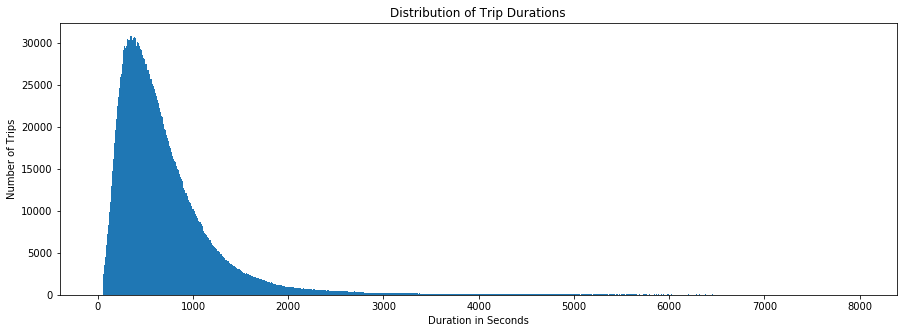

In [4]:
bins = np.arange(0, 8000, 10)
plt.figure(figsize=[15, 5])
plt.hist(data = df_master_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration in Seconds')
plt.ylabel('Number of Trips')
plt.show()

## Top 10 Stations by Ride Count

As we can see here is the most crouded stations in SF. Market street have the most tirp count.

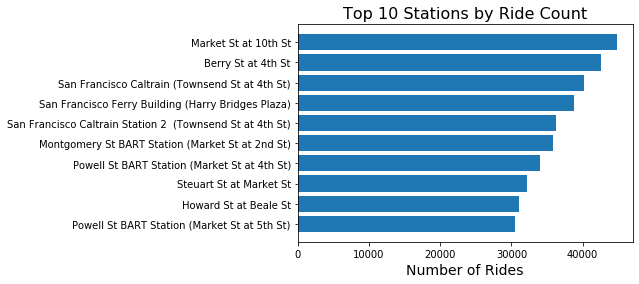

In [5]:
counts = list(df_master_clean['start_station_name'].value_counts())[0:10]
stations = df_master_clean['start_station_name'].value_counts().index.tolist()[0:10]


plt.barh(stations, counts)
plt.xlabel('Number of Rides', fontsize = 14)
plt.title('Top 10 Stations by Ride Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

## The Relation Between Week Days and Hours

This relation can answer the following question, Is the hour and day has the most active rides? As the plot shows, 8AM and 5PM are the most active hours in week days and that make a perfect sence since those are the times where the employees check in and out.

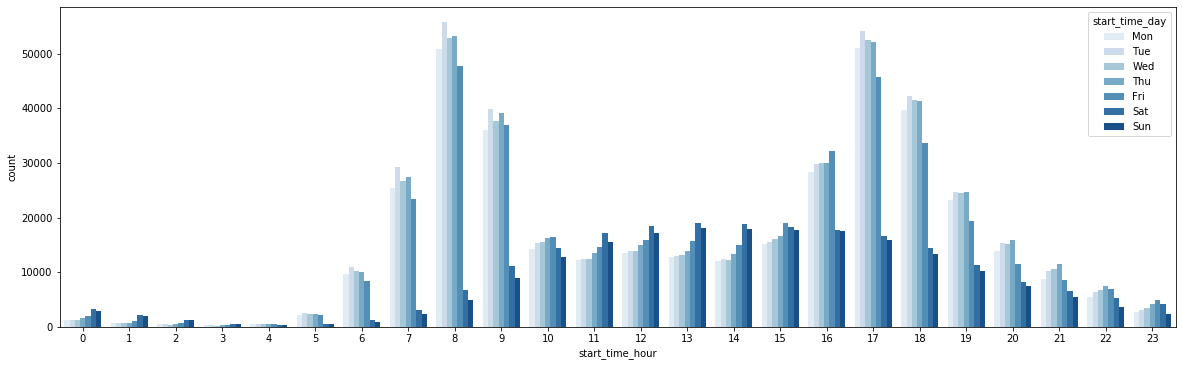

In [6]:
plt.figure(figsize = [20, 20]);
plt.subplot(3, 1, 1);
sb.countplot(data = df_master_clean, x = 'start_time_hour', hue = 'start_time_day', palette = 'Blues');

## Hourly Usage during Weekdays for Customers and Subscribers

the heatmap here is the more of a visual representation of the use of bikes between customers and subscribers. Also, as we can see the heatmap shows subscribers use bikes heavly in work days, where customers are using bikes in the afternoons.

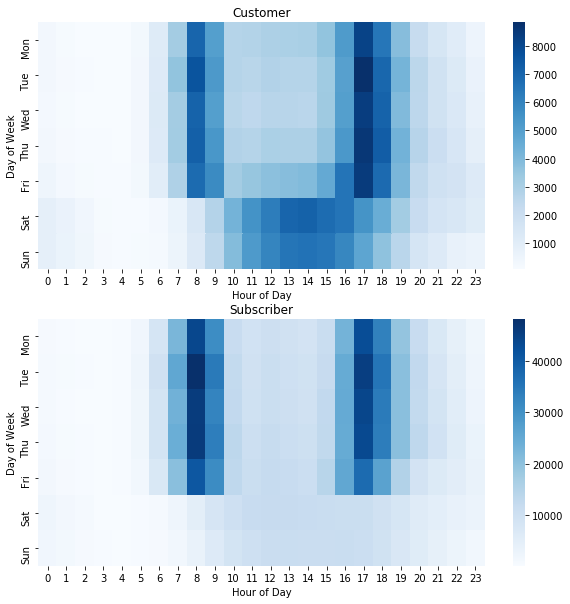

In [10]:
plt.figure(figsize = [10, 10]);
plt.subplot(2, 1, 1)
customers = df_master_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_day', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_time_day', columns='start_time_hour', values='count')
sb.heatmap(ct_counts, cmap='Blues');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_master_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_day', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_time_day', columns='start_time_hour', values='count')
sb.heatmap(st_counts, cmap='Blues');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');